In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import os

In [3]:
plt.style.use('seaborn-v0_8-muted')
palette = (sns.color_palette()).as_hex()
palette = ["#ffffff","#dbf2ff","#7cc5e8","#009ad1","#006787"]
palette2 = ['#C1DDF3', '#F38FB1', '#C3175B', '#49138A', '#AB46BA', '#9B74B9'] # '#007FE7', '#00DFEB',
plt.rcParams['text.usetex'] = True

##### Palettes

In [148]:
sns.color_palette(palette)

[(1.0, 1.0, 1.0),
 (0.8588235294117647, 0.9490196078431372, 1.0),
 (0.48627450980392156, 0.7725490196078432, 0.9098039215686274),
 (0.0, 0.6039215686274509, 0.8196078431372549),
 (0.0, 0.403921568627451, 0.5294117647058824)]

In [9]:
sns.color_palette(palette2)

[(0.7568627450980392, 0.8666666666666667, 0.9529411764705882),
 (0.9529411764705882, 0.5607843137254902, 0.6941176470588235),
 (0.7647058823529411, 0.09019607843137255, 0.3568627450980392),
 (0.28627450980392155, 0.07450980392156863, 0.5411764705882353),
 (0.6705882352941176, 0.27450980392156865, 0.7294117647058823),
 (0.6078431372549019, 0.4549019607843137, 0.7254901960784313)]

##### Total energy consumption

<code>https://www.eia.gov/international/data/world</code> -> Total Energy -> Total energy consumption

In [2]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct*total/100.0
        return '{v:.3f}\n{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

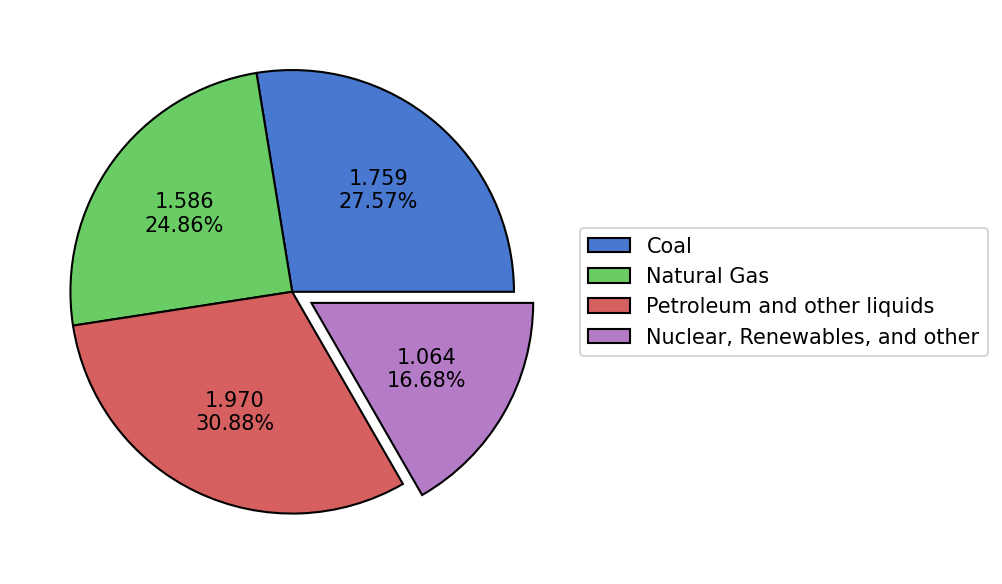

In [74]:
fig, ax = plt.subplots(dpi=150) # add dpi=300 to save the image in high resolution
values = [1.759, 1.586, 1.970, 1.064]
ax.pie(values,
       explode=[0, 0, 0, 0.1],
       wedgeprops={'edgecolor': 'black'},
       autopct=make_autopct(values),
       startangle=0)
# ax.set_title('World\'s Energy Consumption by Source, 2021 [10$^{20}J$]')
_ = ax.legend(loc='center left', 
          labels=['Coal', 'Natural Gas', 'Petroleum and other liquids', 'Nuclear, Renewables, and other'],
          bbox_to_anchor=(1, 0, 0.5, 1))

##### CO2 emissions

<code>https://www.iea.org/data-and-statistics/data-tools/greenhouse-gas-emissions-from-energy-data-explorer</code>

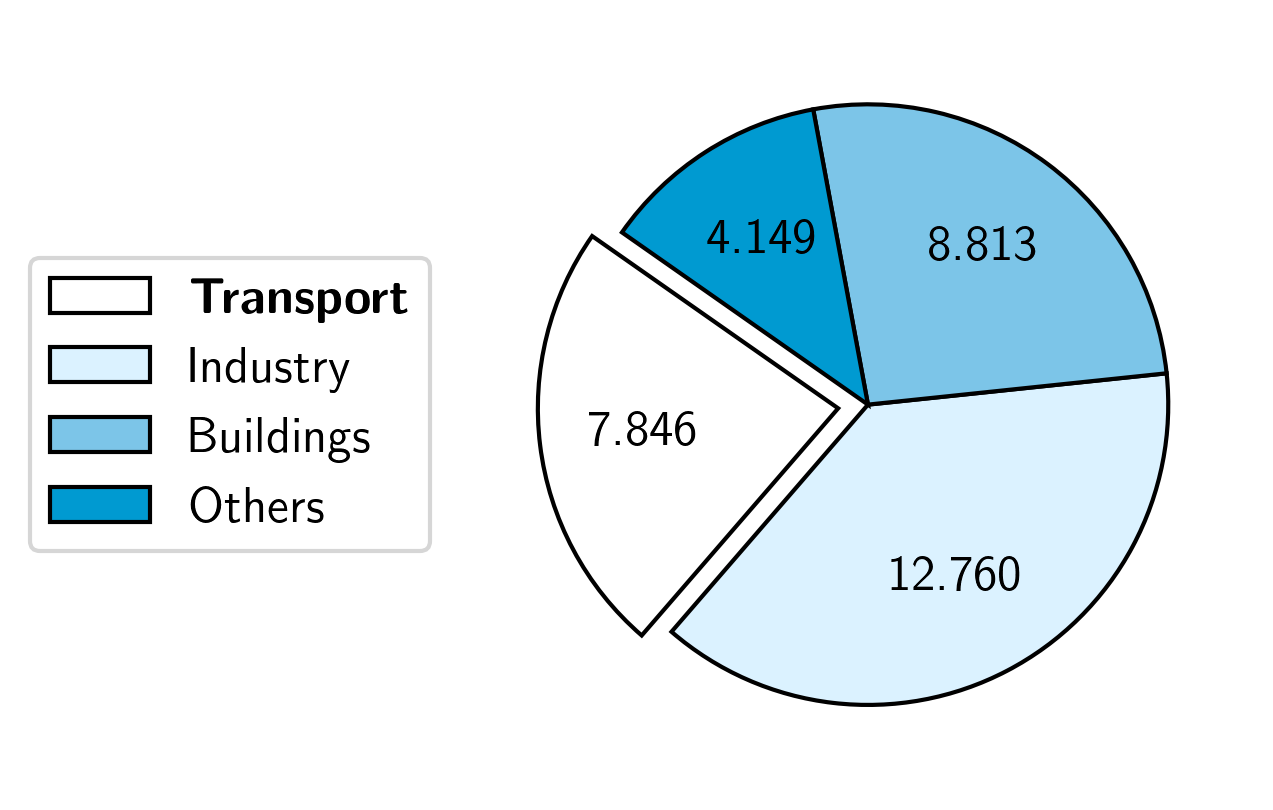

In [6]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct*total/100.0
        return '{v:.3f}'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(figsize=(3.25,3.25), dpi=300) # add dpi=300 to save the image in high resolution
values = [7.846, 12.76, 8.813, 4.149]
ax.pie(values,
       explode=[0.1, 0, 0, 0],
       wedgeprops={'edgecolor': 'black'},
       # labels = ['14.64', r'\textbf{7.631}', '6.340', '2.787', '2.168'],
       autopct=make_autopct(values),
       pctdistance=0.65,
       startangle=145,
       colors=palette,
       textprops={'fontsize':12})
# ax.set_title('Global CO2 emissions from fuel combustion by sector with electricity and heat separated, World [$GtCO_2$]')
_ = ax.legend(loc='center', 
          labels=[r'$\textbf{Transport}$', 'Industry', 'Buildings', 'Others'],
          bbox_to_anchor=(-0.6, 0, 0.5, 1),
          fontsize=12)
fig.savefig('../Images/Chapter1/iea-transport2.png', bbox_inches='tight')

##### Atmospheric CO2 level

<code>https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv</code> Atmospheric CO2 level

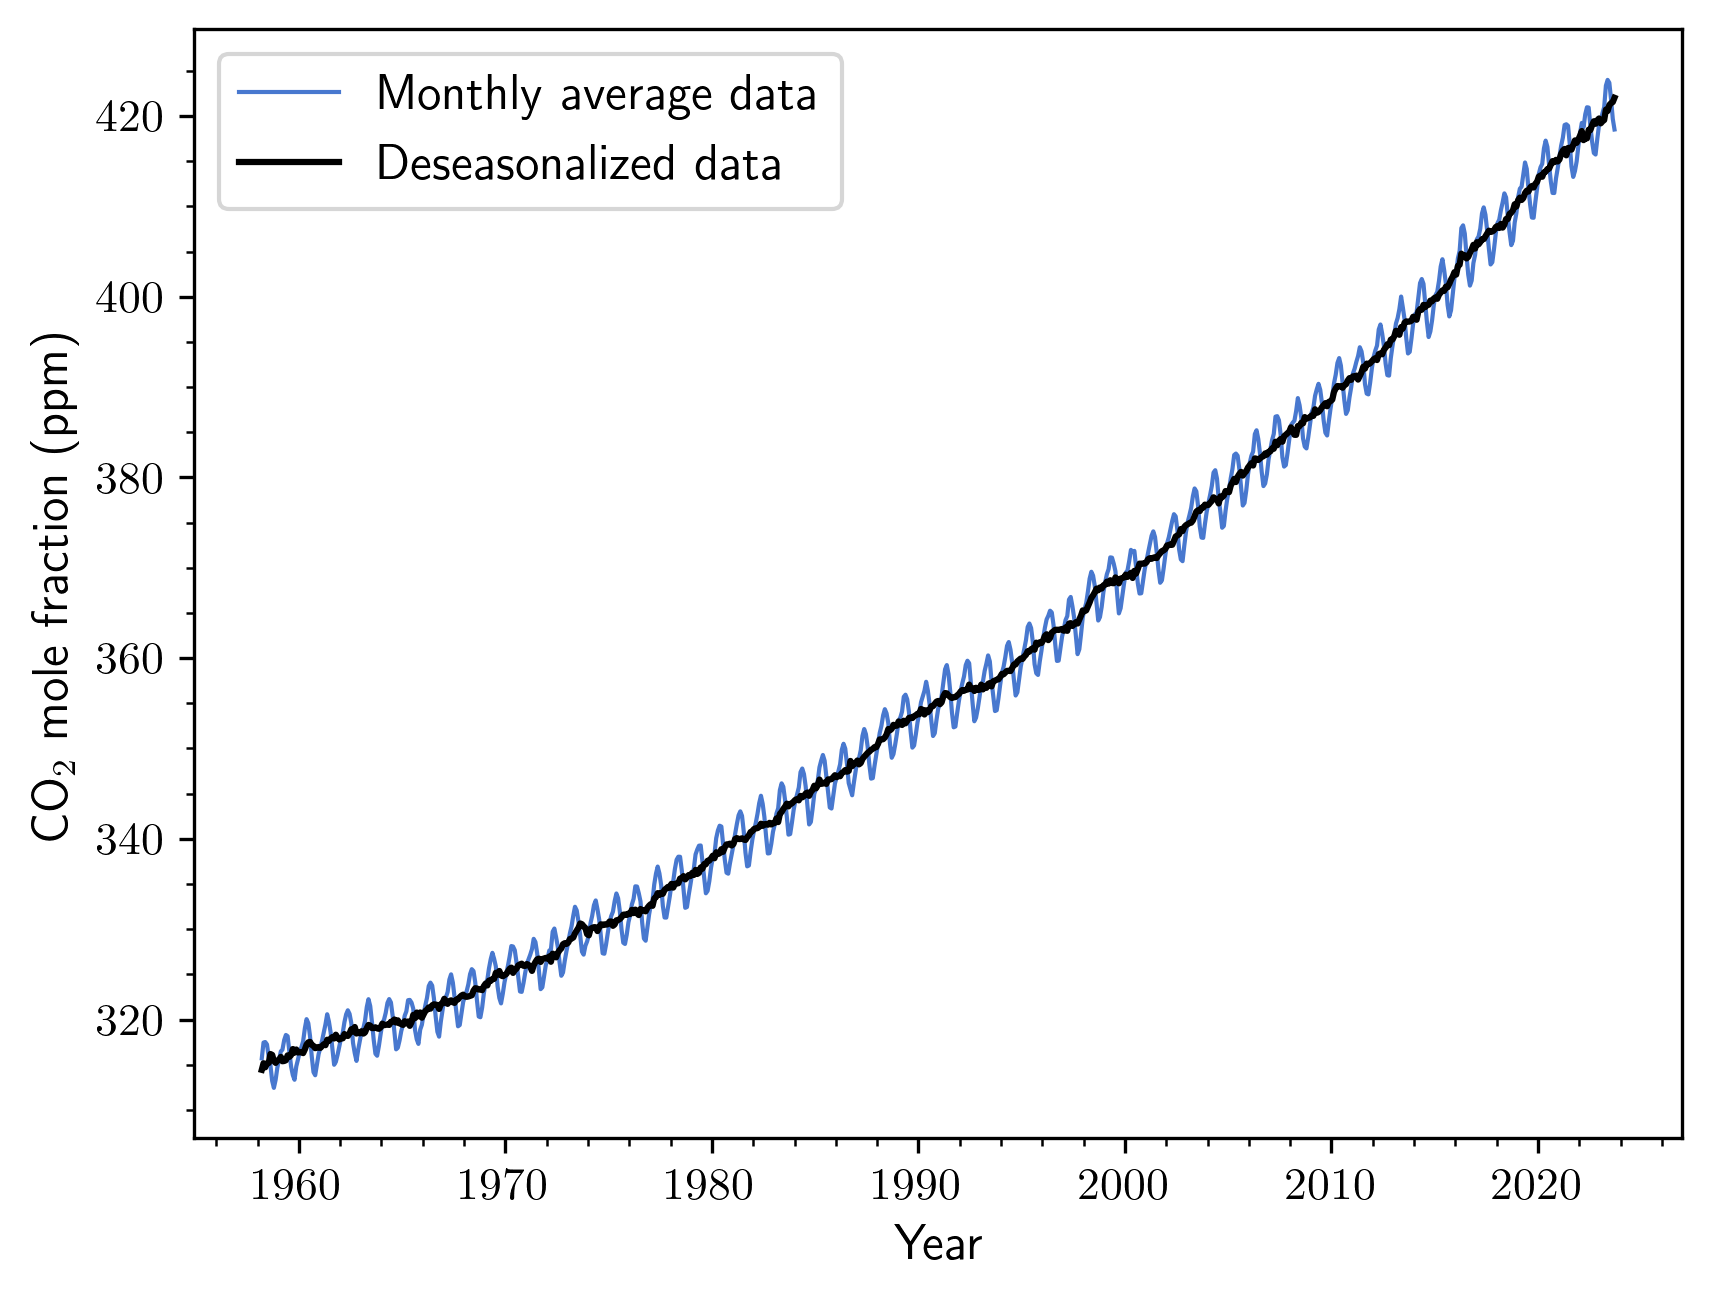

In [7]:
df = pd.read_csv('atmospheric_co2.csv')
fig, ax = plt.subplots(dpi=300) # add dpi=300 to save the image in high resolution
sns.lineplot(ax=ax, data=df, x='decimal date', y='average', linewidth=1, label='Monthly average data')
sns.lineplot(ax=ax, data=df, x='decimal date', y='deseasonalized', linewidth=1.5, c='k', label='Deseasonalized data')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO$_2$ mole fraction (ppm)', fontsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(labelsize=11)
# ax.set_title('Atmospheric CO$_2$ Concentration, 1958-2023')
_ = ax.legend(loc='upper left', fontsize=12)
fig.savefig('../Images/Chapter1/noaa-co2.png', bbox_inches='tight')

##### Semenov Plot

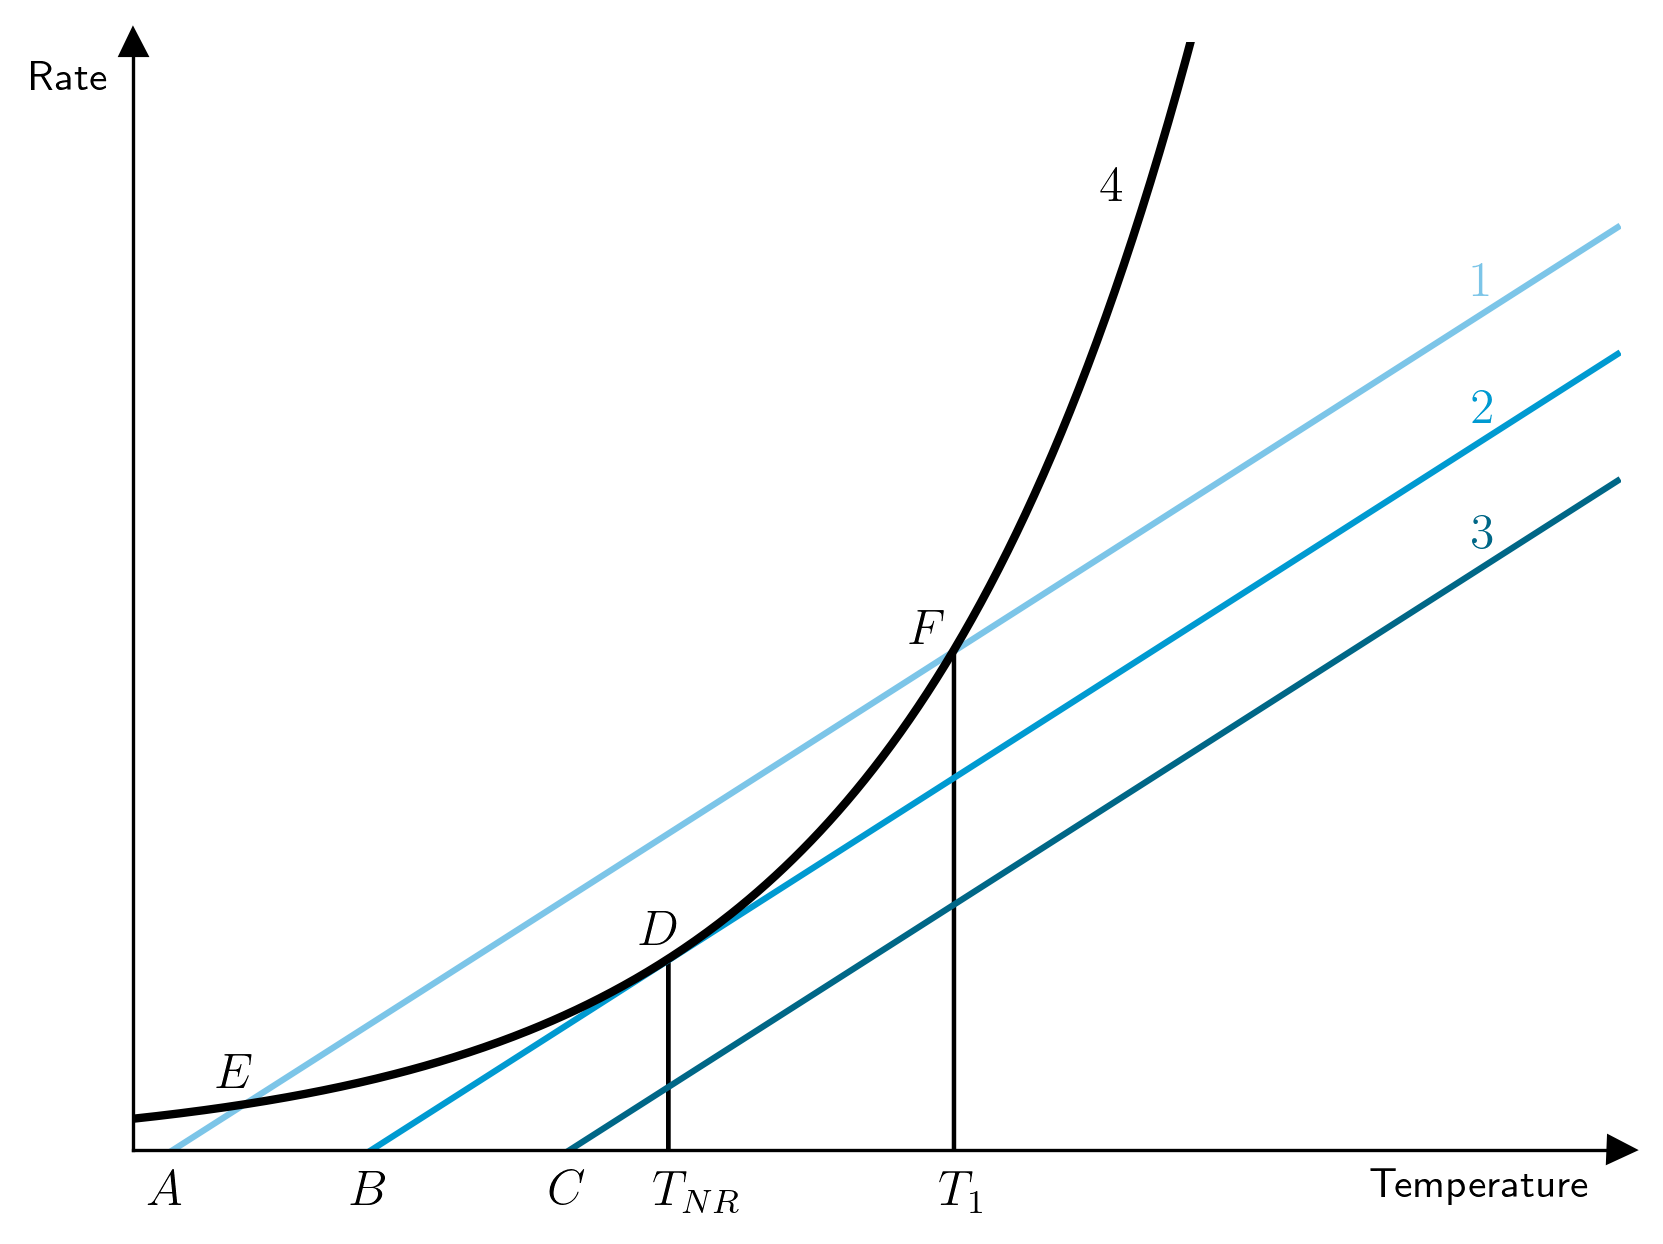

In [8]:
def adjust_plot(ax):
    ax.set_ylim(0, 35)
    ax.set_xlim(0, 5)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel('Temperature', horizontalalignment='right', x=0.98)
    ax.set_ylabel('Rate', rotation=0, labelpad=15, y=0.95)
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.plot(1, 0, '>k', transform=ax.transAxes, clip_on=False)
    ax.plot(0, 1, '^k', transform=ax.transAxes, clip_on=False)
    ax.text(0.05, -1.7, '$A$', fontsize=12)
    ax.text(0.73, -1.7, '$B$', fontsize=12)
    ax.text(1.4, -1.7, '$C$', fontsize=12)
    ax.text(1.7, 6.5, '$D$', fontsize=12)
    ax.text(0.28, 2, '$E$', fontsize=12)
    ax.text(2.61, 16, '$F$', fontsize=12)
    ax.text(1.75, -1.7, '$T_{NR}$', fontsize=12)
    ax.text(2.71, -1.7, '$T_{1}$', fontsize=12)
    ax.text(4.5, 27, '$1$', fontsize=12, color='#7cc5e8')
    ax.text(4.5, 23, '$2$', fontsize=12, color='#009ad1')
    ax.text(4.5, 19, '$3$', fontsize=12, color='#006787')
    ax.text(3.25, 30, '$4$', fontsize=12, color='k')
    ax.arrow(1.8,6,0,-6, shape='full', width=0.001)
    ax.arrow(2.76,15.736,0,-15.736, shape='full', width=0.001)
    return

fig, ax = plt.subplots(dpi=300)
x = np.arange(0, 5, 0.01)
exp1 = np.exp(x)
line1 = 6*x - 0.8
line2 = 6*x - 4.8
line3 = 6*x - 8.8

ax.plot(x, line1, color='#7cc5e8')
ax.plot(x, line2, color='#009ad1')
ax.plot(x, line3, color='#006787')
ax.plot(x, exp1, color='k', linewidth=2)
adjust_plot(ax)
fig.savefig('../Images/Chapter1/semenov-plot.png', bbox_inches='tight')